<a href="https://colab.research.google.com/github/eduardof-rabelo/CS50/blob/main/Aula_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Reading

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
img = '/content/drive/MyDrive/Mestrado/Disciplinas/lenna.png'
img2 = '/content/drive/MyDrive/Mestrado/Disciplinas/panda.png'
image, image2 = imread(img), imread(img2)

In [3]:
image.size, image.shape, image.ndim

(786432, (512, 512, 3), 3)

In [4]:
image2.size, image2.shape, image2.ndim

(786432, (512, 512, 3), 3)

## Variação de escalas de Cinza

In [ ]:
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

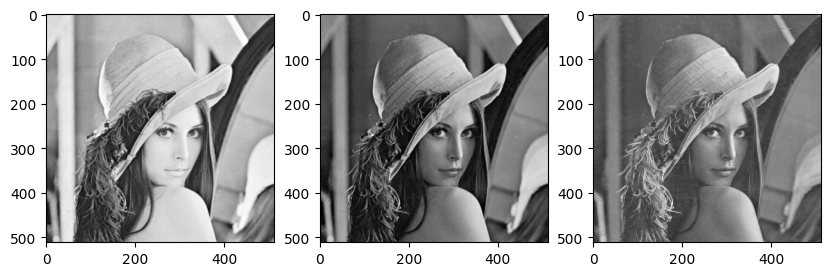

In [ ]:
f, (x1, x2, x3) = plt.subplots(1, 3, figsize = (10,5))
x1.imshow(r, cmap='gray')
x2.imshow(g, cmap='gray')
x3.imshow(b, cmap='gray')

In [ ]:
def vary_grayscale(image, factor):

    grayscale_image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

    varied_image = grayscale_image * factor
    varied_image = np.clip(varied_image, 0, 255)
    varied_image = varied_image.astype(np.uint8)

    return varied_image

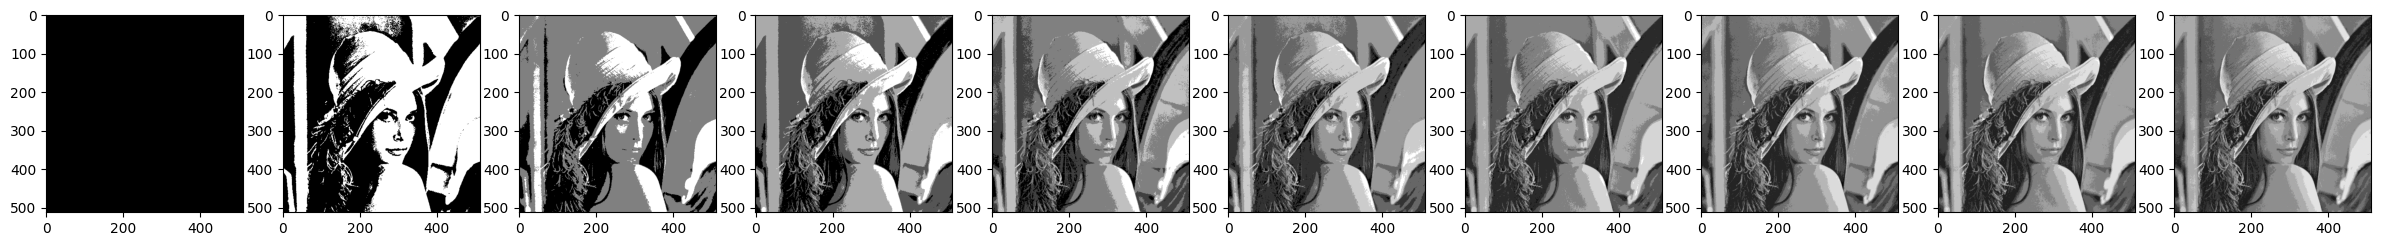

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [ ]:
img = '/content/drive/MyDrive/Mestrado/Disciplinas/lenna.png'
image = plt.imread(img)

fig, ax = plt.subplots(1,10, figsize=(30,500))
k = 0

fator = np.linspace(1.0,10.0,num=10)

for i in fator:
  factor = i
  varied_image = vary_grayscale(image, factor)

  plt.figure(figsize=(10, 5))
  ax[k].imshow(varied_image, cmap='gray')

  k += 1 #Iterador do plot

plt.show()

##Variação de Escala

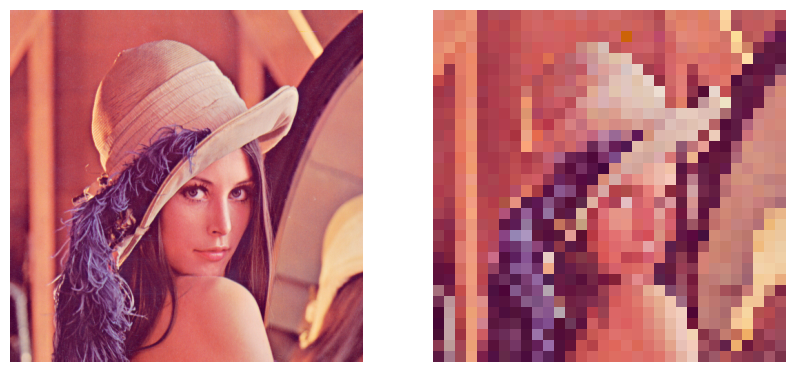

In [ ]:
def downsampling(im : np.ndarray, skip):
  return image[::skip,::skip]

# Carregar a imagem usando plt.imread
img = '/content/drive/MyDrive/Mestrado/Disciplinas/lenna.png'
image = plt.imread(img)
image_resized = downsampling(image,16)

fig, (m,n) = plt.subplots(1,2, figsize=(10,20))
m.axis("off"), n.axis("off")

m.imshow(image)
n.imshow(image_resized)

#Operações Pontuais

## OpenCV

Operações pontuais utilizando biblioteca, são operações simples de serem feitas e aparentemente mais eficientes que as feitas à mão (provavelmente o defeito está na mão de quem construiu o código e não do método!).

(None, None, None)

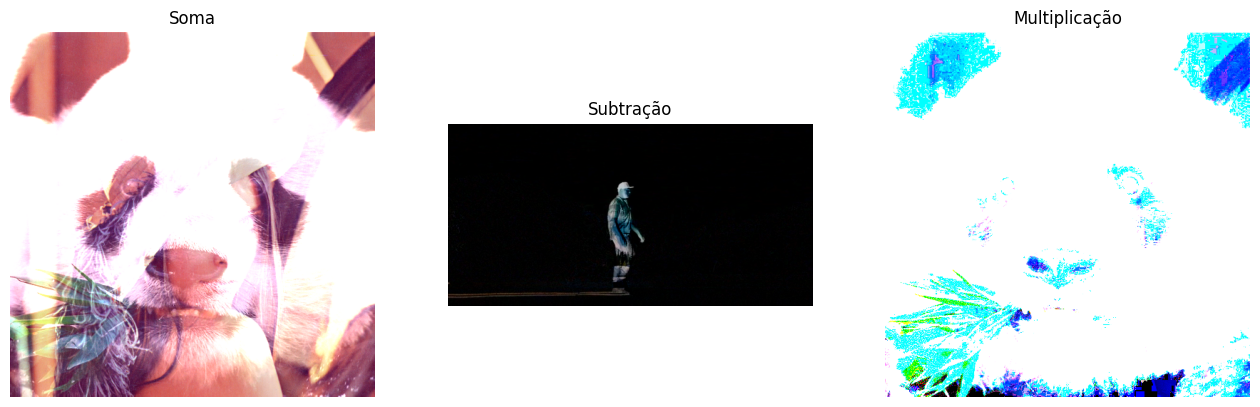

In [5]:
import cv2

img1 = cv2.imread('/content/drive/MyDrive/Mestrado/Disciplinas/lenna.png')
img2 = cv2.imread('/content/drive/MyDrive/Mestrado/Disciplinas/panda.png')
img3 = cv2.imread('/content/drive/MyDrive/Mestrado/Disciplinas/homem1.png')
img4 = cv2.imread('/content/drive/MyDrive/Mestrado/Disciplinas/homem2.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

if img1.shape != img2.shape:
  img1 = cv2.reshape(img1, (512,512), interpolation = cv2.INTER_AREA)
  img2 = cv2.reshape(img2, (512,512), interpolation = cv2.INTER_AREA)

f5, (a1, a2, a3) = plt.subplots(1,3, figsize = (16,16))

somacv2 = cv2.add(img1, img2)
subtracaocv2 = cv2.subtract(img4,img3)
multiplicacaocv2 = cv2.multiply(img1, img2)

a1.imshow(somacv2), a2.imshow(subtracaocv2), a3.imshow(multiplicacaocv2)

a1.set_title("Soma"), a2.set_title("Subtração"), a3.set_title("Multiplicação")
a1.set_axis_off(), a2.set_axis_off(), a3.set_axis_off()

## No libraries

Função de normalização para o formato 8bit (0-255).

In [6]:
def normalize_array(im):
    """
    Normaliza uma np.array entre 0 e 255.

    Parâmetros:
    array (np.array): A array a ser normalizada.

    Retorna:
    np.array: A array normalizada.
    """

    for i in range(3):
      array = im[:,:,i]
      min_val = np.min(array)
      max_val = np.max(array)
      normalized_array = 255 * ((array - min_val) / (max_val - min_val))
      im[:,:,i] = normalized_array.astype(np.uint8)
    return im.astype('uint8')

In [7]:
image = normalize_array(image)
image2 = normalize_array(image2)

(None, None)

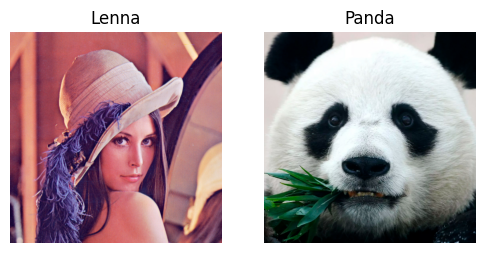

In [59]:
'''Plot de duas imagens utiizadas nas operações:
'''
f1, (y1, y2) = plt.subplots(1,2, figsize = (6,6))
soma = soma_img(image2, 0.5, image, 0.5)
y1.imshow(image), y2.imshow(image2)

y1.set_title("Lenna"), y2.set_title("Panda")
y1.set_axis_off(), y2.set_axis_off()

Funções com as operações pontuais utilizadas garantindo a conservação dos critérios utilizados em 8bit.

In [63]:
def soma_img(im1 : np.ndarray ,x : float, im2 : np.ndarray, y : float):
  img = x*im1 + y*im2
  return img.astype('uint8')

def subtract_img(im1 : np.ndarray, im2 : np.ndarray):
  img = np.subtract(im1,im2)
  img = normalize_array(img)
  return img.astype('uint8')

def multiply_img(im1 : np.ndarray, im2 : np.ndarray):
  img = im1*im2
  return img.astype('uint8')

def log_img(im1 : np.ndarray):
  img = np.log(im1)
  return img.astype('uint8')

def exp_img(im1: np.ndarray):
  img = np.exp(im1)
  return img.astype('uint8')

In [64]:
#Operação de Adição:
soma = soma_img(image2, 0.5, image, 0.5)
soma = normalize_array(soma)

#Operação de Subtração:
subtracao = subtract_img(image2, image)
subtracao = normalize_array(subtracao)

#Operação de Multiplicação:
multiplicacao = multiply_img(image, image)
multiplicacao = normalize_array(multiplicacao)

#Operação Logarítimica:
log = log_img(image)
log = normalize_array(log)

#Operação Exponencial:
exp = exp_img(image)
exp = normalize_array(exp)

<ipython-input-63-af2b43d61004>:15: RuntimeWarning: divide by zero encountered in log
  img = np.log(im1)
<ipython-input-63-af2b43d61004>:16: RuntimeWarning: invalid value encountered in cast
  return img.astype('uint8')
<ipython-input-63-af2b43d61004>:19: RuntimeWarning: overflow encountered in exp
  img = np.exp(im1)
<ipython-input-63-af2b43d61004>:20: RuntimeWarning: invalid value encountered in cast
  return img.astype('uint8')


Plot das operações pontuais:

(None, None, None, None, None)

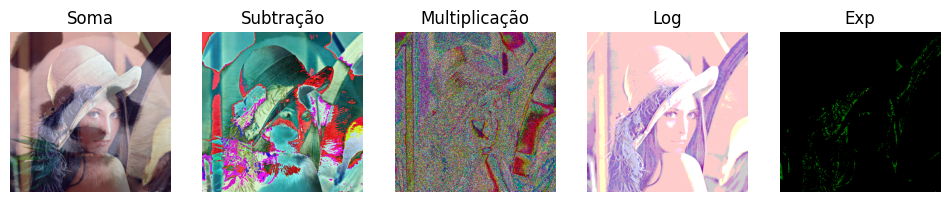

In [65]:
#Subplot das operações:
f2, (k1, k2, k3, k4, k5) = plt.subplots(1,5, figsize = (12,12))

k1.imshow(soma), k2.imshow(subtracao, cmap ='gray'), k3.imshow(multiplicacao), k4.imshow(log), k5.imshow(exp)
#Definição de títulos e retirada de eixos:
k1.set_title("Soma"), k2.set_title("Subtração"), k3.set_title("Multiplicação"),k4.set_title("Log"), k5.set_title("Exp")
k1.set_axis_off(), k2.set_axis_off(), k3.set_axis_off(), k4.set_axis_off(), k5.set_axis_off()

Imagem de um homem andando à frente de um fundo estático. A ideia de aplicar a subtração de imagens nesse momento viria com o intuito de discriminar o homem do *Background*, subtraindo o fundo da imagem e favorecendo a visão do homem. Porém o resultado final não é tão satisfatório quanto na utilização de bibliotecas.

(None, None, None)

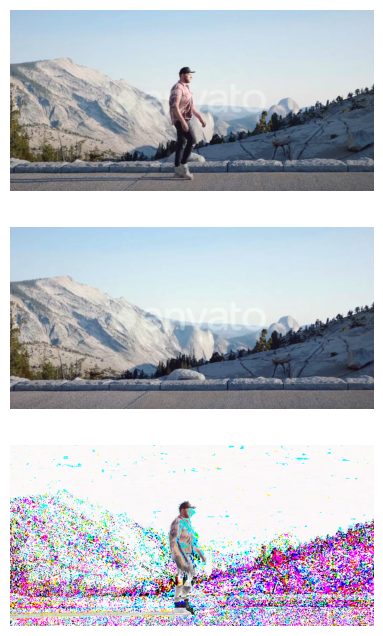

In [12]:
homem1 = '/content/drive/MyDrive/Mestrado/Disciplinas/homem1.png'
homem2 = '/content/drive/MyDrive/Mestrado/Disciplinas/homem2.png'
homem1, homem2 = imread(homem1), imread(homem2)

homem_1 = normalize_array(homem1)
homem_2 = normalize_array(homem2)

f3, (l1, l2, l3) = plt.subplots(3, 1, figsize = (8,8))

sub_homem = subtract_img(homem_1, homem_2)

l1.imshow(homem_1), l2.imshow(homem_2), l3.imshow(sub_homem)

l1.set_axis_off(), l2.set_axis_off(), l3.set_axis_off()

# Histogramas

In [13]:
'''Função de construção do histograma da figura.
1. Faz verificação da quantidade de canais da Imagem. No caso de trabalharmos com
mais de um canal de cor optaremos por utilizar níveis de cinza para as análises;
2. Constrói o Histograma com 256 bins a partir da matriz da Imagem;
3. Posicionamento das colunas na plot;
4. Plot do Histograma.

A função retorna os parâmetros utilizados na criação do histograma, i.e. retorna
o np.array com a quantidade de ocorrência para cada nível de cor.
'''
def histograma_imagem(imagem, i, cor):
    if len(imagem.shape) > 2:
        imagem = np.dot(imagem[...,:3], [0.2989, 0.5870, 0.1140])

    hist, bins = np.histogram(imagem.flatten(), bins=256, range=[0,256])

    bin_centers = 0.5*(bins[:-1] + bins[1:])

    i.bar(bin_centers, hist, width=1, color = cor)

    return hist

def histograma_imagem_plot(imagem, i, cor):
    if len(imagem.shape) > 2:
          imagem = np.dot(imagem[...,:3], [0.2989, 0.5870, 0.1140])

    hist, bins = np.histogram(imagem.flatten(), bins=256, range=[0,256])

    bin_centers = 0.5*(bins[:-1] + bins[1:])

    i.plot(bin_centers, hist, color = cor)

    return hist

'''Função auxiliar para plotar o histograma de cada um dos canais de cor (quando
houver) + o canal cinza em um único plot indicando no final a imagem analisada.
'''
def plt_hist(im : np.ndarray):

  g, (g1, g2, g3, g4) = plt.subplots(1,4, figsize=(12,3))
  #Canal de cor Vermelho (R):
  histograma_imagem(im[:,:,0], g1, 'red')
  #Canal de cor Vermelho (G):
  histograma_imagem(im[:,:,1], g2, 'green')
  #Canal de cor Vermelho (B):
  histograma_imagem(im[:,:,2], g3, 'blue')
  #Níveis de Cinza:
  histograma_imagem(im, g4, 'gray')
  g.supylabel('Frequência'), g.supxlabel('Níveis')

  #Imagem Fonte:
  g4 = g.add_axes([0.6, 0.2, 1, .5])
  g4.imshow(im)

'''Função responsável por retornar apenas o histograma dos níveis de cinza e a
np.array com índices e frequências de cada nível.

** Ignora os outros canais e observa apenas os níveis de cinza**
'''
def get_gray_hist(im1, c):
  fig, ax = plt.subplots(1, figsize=(4,4))
  ax.set_xlabel("Níveis")
  ax.set_ylabel("Frequência")
  return histograma_imagem_plot(im1, ax, c)

Histograma de cada canal de cor de forma separada, um para o canal Vermelho, outro para Verde, Azul e o último em níveis de cinza.

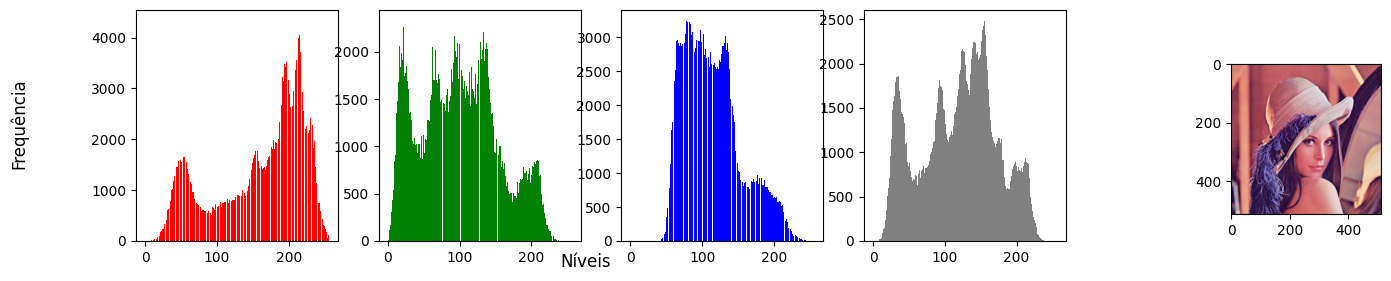

In [15]:
plt_hist(image)

## Equalização dos histogramas:

Histograma da imagem em níveis de cinza:

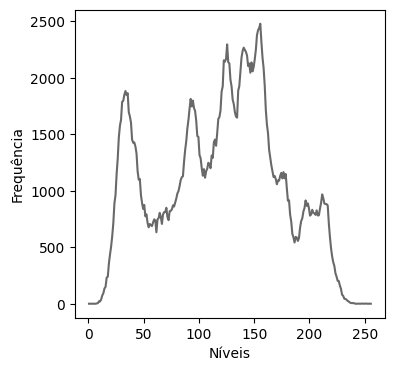

In [16]:
hist_array = get_gray_hist(image, 'dimgray')

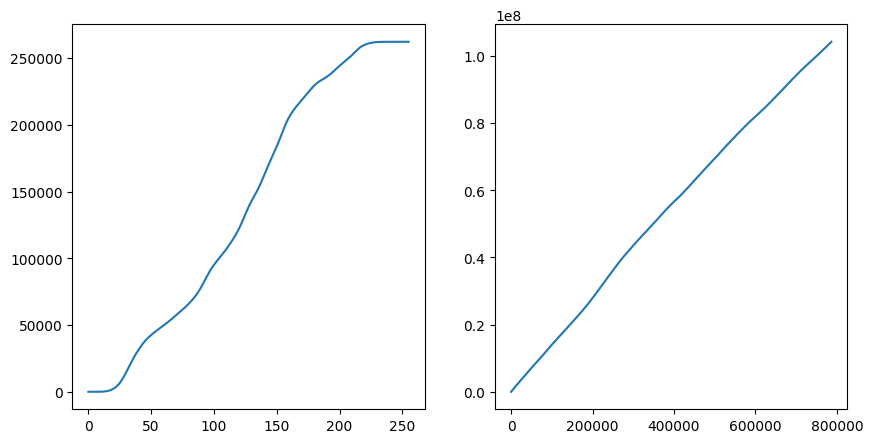

In [75]:
'''Função que pega a soma cumulativa a partir da np.array que contém as
informações necessárias para construir o histograma da figura.
Índice x Frequência
'''
cs = np.cumsum(hist_array)

fig = plt.figure(figsize=(4,4))
fig.set_figheight(5)
fig.set_figwidth(10)

fig.add_subplot(121)
plt.plot(cs)

'''Normalizando as soma cumulativa do histograma, obetendo os parêmetros
variando entre 0 e 255.
'''
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()
cs = nj / N
cs = cs.astype('uint8')

equalization = cs[image]
equalization = np.reshape(equalization, image.shape)

cs = np.cumsum(equalization)

fig.add_subplot(122)
plt.plot(cs)
plt.show(block=True)

Comparação entre Imagem Original e Imagem equalizada com percepção de variação de constraste de cores após processo de equalização.

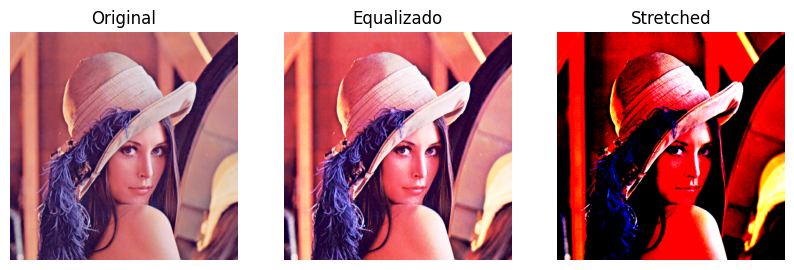

In [70]:
fig = plt.figure(figsize=(4,4))
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(231)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

# display the new image
fig.add_subplot(232)
plt.imshow(equalization, cmap='gray')
plt.title("Equalizado")
plt.axis('off')

fig.add_subplot(233)
plt.imshow(new_image, cmap='gray')
plt.title("Stretched")
plt.axis('off')

plt.show(block=True)

In [71]:
def stretch(a, lower_thresh, upper_thresh):
    r = 255.0/(upper_thresh-lower_thresh+2) # unit of stretching
    out = np.round(r*(a-lower_thresh+1)).astype(a.dtype) # stretched values
    out[a<lower_thresh] = 0
    out[a>upper_thresh] = 255
    return out

In [77]:
new_image = stretch(image, lower_thresh=150, upper_thresh=255)

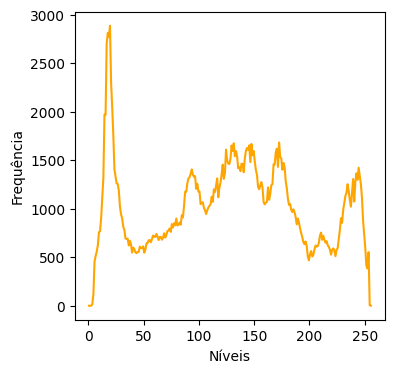

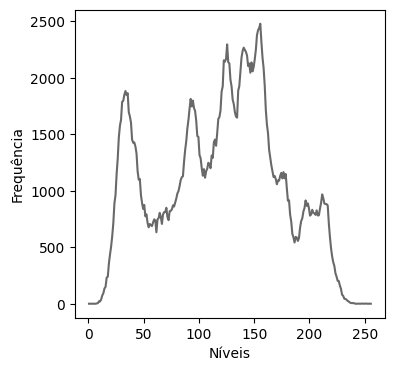

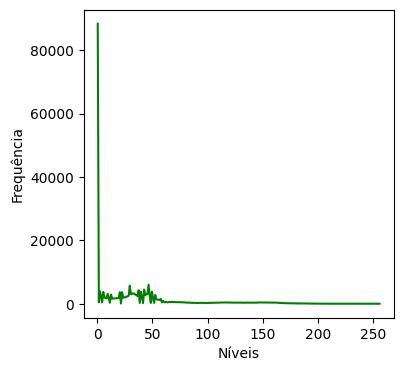

In [78]:
"""Arrays do Histograma Equalizado, Histograma Original e Comprimido:
"""
#Equalizado
hist_eq = get_gray_hist(equalization, 'orange')
#Original
hist_array = get_gray_hist(image, 'dimgray')
#Stretch/Compressão
hist_stretch = get_gray_hist(new_image, 'green')

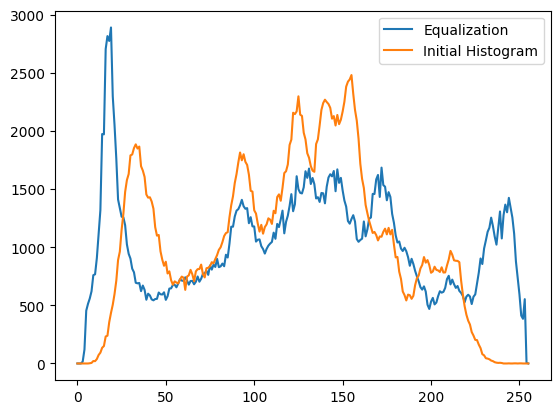

In [66]:
#Plot dos Histogramas sobrepostos
fig, ax = plt.subplots(1,1)
ax.plot(hist_eq, label="Equalization")
ax.plot(hist_array, label="Initial Histogram")
#ax.plot(hist_stretch, label ='Stretch Histogram')
ax.legend()